In [3]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%cd /content/drive/My Drive/panda/

/content/drive/My Drive/panda


#**Reading a Excel file**

In [5]:
df = pd.read_excel("stock_data.xlsx","Sheet1")
df

tickers            eps  revenue price         people
0   GOOGL          27.82       87   845     larry page
1     WMT           4.61      484    65           n.a.
2    MSFT             -1       85    64     bill gates
3    RIL   not available       50  1023  mukesh ambani
4    TATA            5.6       -1  n.a.     ratan tata

#**Using converters**
#1.  Defining function "convert_people_cell" in order to convert the cell of people column whose value is n.a by Sam Walton

#2.    Defining function "convert_price_cell" in order to convert the cell of price column whose value is n.a by 50







In [6]:
def convert_people_cell(cell):
    if cell=="n.a.":
        return 'Sam Walton'
    return cell

def convert_price_cell(cell):
    if cell=="n.a.":
        return 50
    return cell
    
df = pd.read_excel("stock_data.xlsx","Sheet1", converters= {
        'people': convert_people_cell,
        'price': convert_price_cell
    })
df

tickers            eps  revenue  price         people
0   GOOGL          27.82       87    845     larry page
1     WMT           4.61      484     65     Sam Walton
2    MSFT             -1       85     64     bill gates
3    RIL   not available       50   1023  mukesh ambani
4    TATA            5.6       -1     50     ratan tata

#**Write to a Excel file**

In [7]:
df.to_excel("new.xlsx", sheet_name="stocks")

#output:
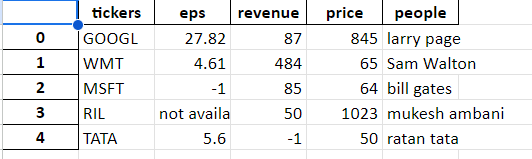

#1.   using index =false to remove the index
#2.   Using startrow=n to write in a excel file starting from the nth row (index starts from 0)
#3.   Using startcol=n1 to write in a excel file starting from the n1th column (index starts from 0)





In [8]:
df.to_excel("new.xlsx", sheet_name="stocks", index=False, startrow=2, startcol=1)

#output:
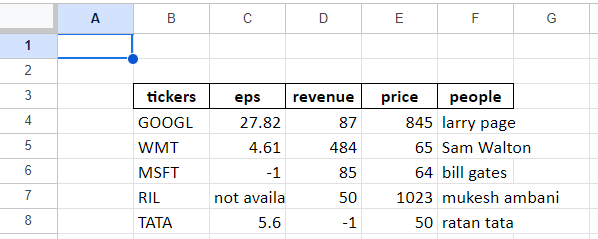

#**Write two dataframes to two separate sheets in excel**

In [9]:
# creating two dataframes using dictionary
df_stocks = pd.DataFrame({
    'tickers': ['GOOGL', 'WMT', 'MSFT'],
    'price': [845, 65, 64 ],
    'pe': [30.37, 14.26, 30.97],
    'eps': [27.82, 4.61, 2.12]
})

df_weather =  pd.DataFrame({
    'day': ['1/1/2017','1/2/2017','1/3/2017'],
    'temperature': [32,35,28],
    'event': ['Rain', 'Sunny', 'Snow']
})

#**using ExcelWriter to Write two dataframes to two separate sheets in excel**

In [10]:
with pd.ExcelWriter('stocks_weather.xlsx') as writer:
    df_stocks.to_excel(writer, sheet_name="stocks")
    df_weather.to_excel(writer, sheet_name="weather")